In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
import pickle
import seaborn as sns
from scipy import stats
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0dae7cee8d5c4077b9491bc704983030 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='iXE5sBuD6xuEb4KXSySB7Maa8ZEFJCAiCXtyVlMAmxyE',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

body = client_0dae7cee8d5c4077b9491bc704983030.get_object(Bucket='houserentpriceprediction-donotdelete-pr-zpjfpgny99thzn',Key='99acres_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,2 Baths,470,Carpet Area,Residential,Kolshet Road,75000.0
1,mumbai,75000.0,3.0,3 Baths,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0
2,mumbai,60000.0,2.0,2 Baths,950,Super built-up Area,Residential,Wadala,200000.0
3,mumbai,52000.0,3.0,3 Baths,1300,Carpet Area,Residential,Hiranandani Estate,300000.0
4,mumbai,30000.0,1.0,1 Bath,550,Built-up Area,Residential,Kanjurmarg (East),150000.0


Numbers Of Area Type :

Super built-up Area    69918
Carpet Area            36847
Built-up Area          29104
Plot Area              10659
Name: build_up_area, dtype: int64


<AxesSubplot:xlabel='build_up_area', ylabel='count'>

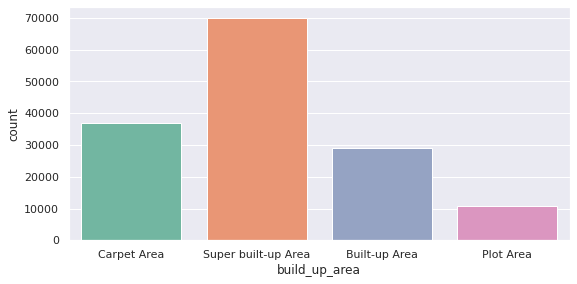

In [3]:
print("Numbers Of Area Type :")
print()
print(df['build_up_area'].value_counts())
sns.set(rc = {'figure.figsize':(8,4)})
sns.countplot(x='build_up_area', data=df, palette = 'Set2')

Types of Property :

Residential    102024
Independent     41243
Studio           2606
Serviced          363
Farm              161
for               118
Floor              13
Name: Type_of_property, dtype: int64


<AxesSubplot:xlabel='Type_of_property', ylabel='count'>

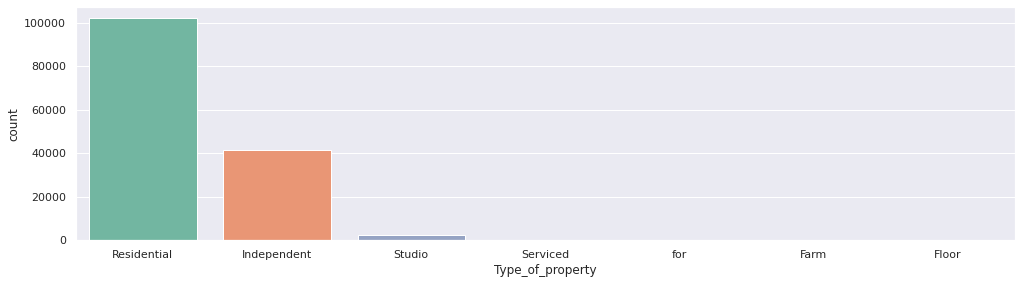

In [4]:
print("Types of Property :")
print()
print(df['Type_of_property'].value_counts())
sns.set(rc = {'figure.figsize':(15,4)})
sns.countplot(x='Type_of_property', data=df, palette = 'Set2')

Property Located Based On City :

ncr            42016
mumbai         37566
bangalore      25600
pune           18176
chennai         9973
hyderabad       7131
Ahmedabad       5602
Trivandraum      464
Name: city, dtype: int64


<AxesSubplot:xlabel='city', ylabel='count'>

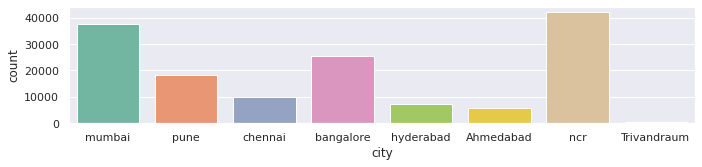

In [5]:
print("Property Located Based On City :")
print()
print(df['city'].value_counts())
sns.set(rc = {'figure.figsize':(10,2)})
sns.countplot(x='city', data=df, palette = 'Set2')

<AxesSubplot:xlabel='monthly_rant'>

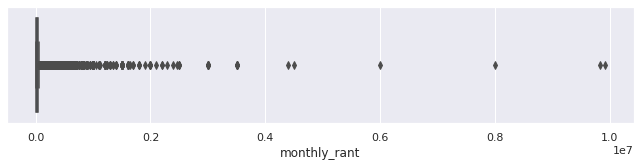

In [6]:
sns.boxplot(df['monthly_rant'])

<AxesSubplot:>

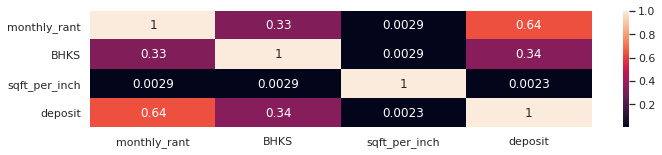

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
df.describe(include='all')

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
count,146528,1.465280e+05,146528.000000,146528,1.465280e+05,146528,146528,146528,1.465280e+05
unique,8,NaN,NaN,41,NaN,4,7,12555,NaN
top,ncr,NaN,NaN,2 Baths,NaN,Super built-up Area,Residential,Goregaon (East),NaN
freq,42016,NaN,NaN,68767,NaN,69918,102024,807,NaN
mean,NaN,3.414242e+04,2.159703,NaN,2.463806e+03,NaN,NaN,NaN,1.203667e+05
std,NaN,8.428243e+04,1.107673,NaN,1.816119e+05,NaN,NaN,NaN,2.937736e+05
min,NaN,5.000000e+02,1.000000,NaN,1.000000e+00,NaN,NaN,NaN,0.000000e+00
25%,NaN,1.300000e+04,1.000000,NaN,6.800000e+02,NaN,NaN,NaN,3.000000e+04
50%,NaN,2.000000e+04,2.000000,NaN,1.057000e+03,NaN,NaN,NaN,6.000000e+04
75%,NaN,3.290000e+04,3.000000,NaN,1.500000e+03,NaN,NaN,NaN,1.250000e+05


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146528 entries, 0 to 146527
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   city                      146528 non-null  object 
 1   monthly_rant              146528 non-null  float64
 2   BHKS                      146528 non-null  float64
 3   Baths                     146528 non-null  object 
 4   sqft_per_inch             146528 non-null  int64  
 5   build_up_area             146528 non-null  object 
 6   Type_of_property          146528 non-null  object 
 7   location_of_the_property  146528 non-null  object 
 8   deposit                   146528 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 10.1+ MB


In [10]:
df.shape

(146528, 9)

In [11]:
#Checking Null values
df.isnull().sum()

city                        0
monthly_rant                0
BHKS                        0
Baths                       0
sqft_per_inch               0
build_up_area               0
Type_of_property            0
location_of_the_property    0
deposit                     0
dtype: int64

In [12]:
# Droping a features
df.drop(['Baths','location_of_the_property'],axis=1,inplace=True)

In [13]:
df.Type_of_property.unique()

array(['Residential', 'Independent', 'Studio', 'Serviced', 'for', 'Farm',
       'Floor'], dtype=object)

In [14]:
df = df[df.Type_of_property!='for']
df.shape

(146410, 7)

In [15]:
df = df[df.Type_of_property!='Serviced']
df.shape

(146047, 7)

In [16]:
df = df[df.Type_of_property!='Floor']
df.shape

(146034, 7)

In [17]:
df.Type_of_property.unique()

array(['Residential', 'Independent', 'Studio', 'Farm'], dtype=object)

In [18]:
df['monthly_rant']=np.log1p(df['monthly_rant'])

<AxesSubplot:xlabel='monthly_rant', ylabel='Density'>

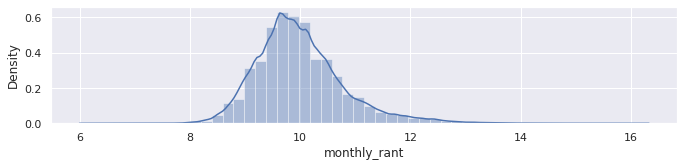

In [19]:
sns.distplot(df['monthly_rant'])

In [20]:
cty = LabelEncoder()
b_u_a = LabelEncoder()
T_o_p = LabelEncoder()
#l_o_t_p = LabelEncoder()

df['city'] = cty.fit_transform(df['city'])
df['build_up_area'] = b_u_a.fit_transform(df['build_up_area'])
df['Type_of_property'] = T_o_p.fit_transform(df['Type_of_property'])
#df['location_of_the_property'] = l_o_t_p.fit_transform(df['location_of_the_property'])

In [21]:
print("city",df['city'].unique())
print(cty.inverse_transform(list(df['city'].unique())))
print()
print("build_up_area:",df['build_up_area'].unique())
print(b_u_a.inverse_transform(list(df['build_up_area'].unique())))
print()
print("Type_of_property", df['Type_of_property'].unique())
print(T_o_p.inverse_transform(list(df['Type_of_property'].unique())))
print()
#print(\"location_of_the_property\",df['location_of_the_property'].unique())
#print(l_o_t_p.inverse_transform(list(df['location_of_the_property'].unique())))

city [5 7 3 2 4 0 6 1]
['mumbai' 'pune' 'chennai' 'bangalore' 'hyderabad' 'Ahmedabad' 'ncr'
 'Trivandraum']

build_up_area: [1 3 0 2]
['Carpet Area' 'Super built-up Area' 'Built-up Area' 'Plot Area']

Type_of_property [2 1 3 0]
['Residential' 'Independent' 'Studio' 'Farm']



In [22]:
#Seperating the variable Independent matrix X and dependent Vector y
x = df.drop('monthly_rant',axis=1)
y = df.monthly_rant

In [23]:
# Spliting the data into Training set & Test set
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)

In [24]:
print('Shape of xtrain {}'.format(xtrain.shape))
print('Shape of xtest {}'.format(xtest.shape))
print('Shape of ytrain {}'.format(ytrain.shape))
print('Shape of ytest {}'.format(ytest.shape))

Shape of xtrain (116827, 6)
Shape of xtest (29207, 6)
Shape of ytrain (116827,)
Shape of ytest (29207,)


In [25]:
# Data Normalization
st=StandardScaler()
xtrain_scaled=st.fit_transform(xtrain)
xtest_scaled=st.transform(xtest)

In [26]:
def linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest):
    lr=LinearRegression()
    lr.fit(xtrain_scaled,ytrain)
    ypred=lr.predict(xtest_scaled)
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***Linear Regression model***')
    print('Score for Linear Regression model is {}'.format(score))
    print('RMSE for Linear Regression model is {}'.format(rmse))

In [27]:

def random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest):
    rf=RandomForestRegressor()
    rf.fit(xtrain_scaled,ytrain)
    ypred=(rf.predict(xtest_scaled))
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***Random Forest Regressor Model***')
    print('Score for Random Forest Regressor Model is {}'.format(score))
    print('RMSE for Random Forest Regressor Model is {}'.format(rmse))

In [28]:
def gradient_boosting_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest):
    gb=GradientBoostingRegressor()
    gb.fit(xtrain_scaled,ytrain)
    ypred=(gb.predict(xtest_scaled))
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***Gradient Boosting Regressor Model***')
    print('Score for Gradient Boosting Regressor Model is {}'.format(score))
    print('RMSE for Gradient Boosting Regressor Model is {}'.format(rmse))

In [29]:
def model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest):
    linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)
    random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)
    gradient_boosting_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)

In [30]:
model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest)

***Linear Regression model***
Score for Linear Regression model is 0.47784477380544765
RMSE for Linear Regression model is 0.574125771758495
----------------------------------------------------------------------------------------------------
***Random Forest Regressor Model***
Score for Random Forest Regressor Model is 0.8954133601284658
RMSE for Random Forest Regressor Model is 0.25694805394457554
----------------------------------------------------------------------------------------------------
***Gradient Boosting Regressor Model***
Score for Gradient Boosting Regressor Model is 0.877853968570921
RMSE for Gradient Boosting Regressor Model is 0.2776814754062416
----------------------------------------------------------------------------------------------------


In [31]:
rf=RandomForestRegressor()
rf.fit(xtrain_scaled,ytrain)
ypred=(rf.predict(xtest_scaled))

In [32]:
pickle.dump(rf,open('model.pkl','wb'))

# IBM Machine learning

In [33]:
#pip install ibm_watson_machine_learning

In [34]:
import ibm_watson_machine_learning

In [35]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
                   "url": "https://eu-gb.ml.cloud.ibm.com",
                   "apikey":"Bt_Jenp2FZ2FENfapcA5zzoar21JeA2GDjaLm8t7tmMk"
                  }

wml_client = APIClient(wml_credentials)
wml_client.spaces.list()


Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----  ------------------------
ID                                    NAME   CREATED
543ab1a2-ba2d-49d3-a7c7-fa3b11b31248  model  2022-03-10T12:50:49.124Z
------------------------------------  -----  ------------------------


In [36]:
SPACE_ID = "543ab1a2-ba2d-49d3-a7c7-fa3b11b31248"

In [37]:
wml_client.set.default_space(SPACE_ID) #setting default space

'SUCCESS'

In [38]:
MODEL_NAME = "House"
DEPLOYMENT_NAME = "house_rent"
BEST_MODEL = rf

In [39]:
#setting python version
software_spec_uid = wml_client.software_specifications.get_id_by_name("default_py3.8")
#setup model meta- model properties
model_props = {
    

wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
 wml_client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
  wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [40]:
#saving the model
model_details = wml_client.repository.store_model(
    model = BEST_MODEL,
    meta_props = model_props,
    training_data = xtrain,
    training_target = ytrain
 )

Note: Warnings!! :  Software specification default_py3.8 specified for the wml_model is deprecated and will be removed in the future. We recommend you use runtime-22.1-py3.9 instead. For details see Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [41]:
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [42]:
model_uid = wml_client.repository.get_model_id(model_details)

# Model Deployment

In [43]:
#set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [44]:
deployment = wml_client.deployments.create(artifact_uid=model_uid,meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: '766604e2-3fc0-47a1-80db-2d51ca79ce6b' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.
.
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='c06aa403-dd88-49ca-8e12-118639e49ccd'
------------------------------------------------------------------------------------------------




In [45]:
deployment_uid =wml_client.deployments.get_uid(deployment)
deployment_uid

'c06aa403-dd88-49ca-8e12-118639e49ccd'